In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#######################################################################################
# Reading the data file (CSV) and defining feature and target column
#######################################################################################
# 1. Reading the data file (CSV)
df = pd.read_csv("../0000_Data/01-raw/01-Ad.csv")

# 2. Defining feature columns and target column
x_values = df.iloc[:, 3:5].values
y_values = df.iloc[:, -1].values    

In [3]:
########################################################################################
# Preprocessing Data
########################################################################################
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25, stratify=y_values, random_state=40)

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4]:
##########################################################################################
# Building the Model & Prediction with Decision Tree Classifier
##########################################################################################
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=40)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [5]:
#########################################################################################
# Evaluating the Model with F1 Score & AUC & Accuracy
#########################################################################################
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1 Score: 0.8571
AUC: 0.8958
Accuracy: 0.8900


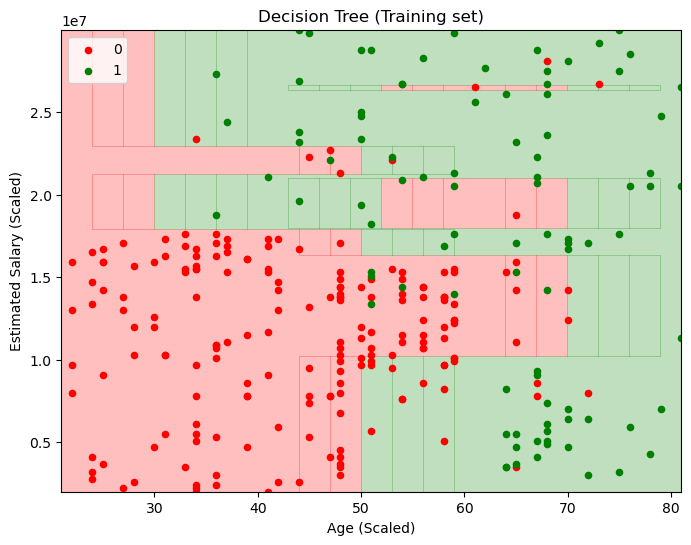

F1 Score: 0.8571
AUC: 0.8958
Accuracy: 0.8900


In [6]:
######################################################
# Visualization of the model's decision boundaries
######################################################
model_name = "Decision Tree"
is_scaled = True

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

cmap = ListedColormap(["red", "green"])

x_set, y_set = x_train, y_train


x1, x2 = np.meshgrid(
    np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=20),
    np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=20)
)

Z = model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.figure(figsize=(8,6))
plt.contourf(x1, x2, Z, alpha=0.25, cmap=cmap)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], s=20, color=cmap(i), label=j)

plt.title(f"{model_name} (Training set)")
plt.xlabel("Age (Scaled)" if is_scaled else "Age")
plt.ylabel("Estimated Salary (Scaled)" if is_scaled else "Estimated Salary")
plt.legend()
plt.show()

######################################################
# Evaluating the Model
######################################################
y_pred = model.predict(x_test)

f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


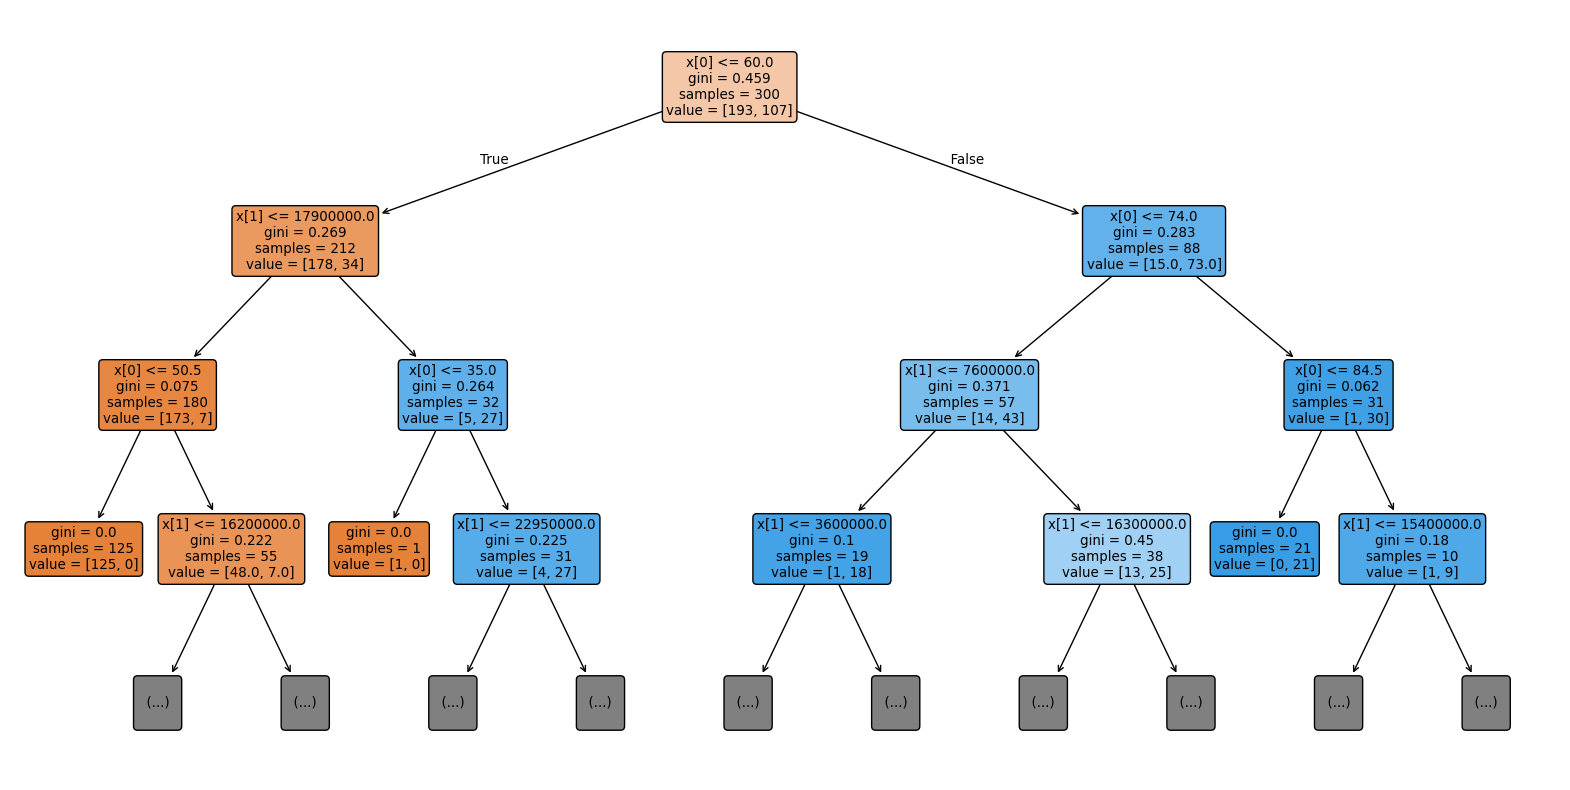

In [8]:
# Plot Tree with max_depth = 3 & figsize = (20, 10)

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, rounded=True, max_depth=3)
plt.show()